In [67]:
import sys
sys.path.append('../_amigocloud')

In [68]:
import simplekml

In [69]:
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
#from shapely.geometry import Point, MultiPoint
import os
#from fastkml import kml

In [70]:
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]

In [71]:
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

In [72]:
# leer los dos shps de siembra y puntos de planificacion
path_siembras = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\SIEMBRAS.shp'
path_cat = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\catastro140624.shp'
path_puntos = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PUNTOS_PLAN.shp'

path_plan = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION.shp'

path_kml = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN'

path_xlsx_parte = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\PARTE DIARIO TRICHOGRAMMA 2024_RES.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [73]:
ors =59

In [74]:
gdf_siembras = gpd.read_file(path_siembras)
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [75]:
# verifica si ambos shps tienen el mismo CRS
if gdf_siembras.crs == gdf_puntos.crs:
    print('Ambas capas tienen el mismo CRS')
else:
    print('No tienen el mismo CRS')

Ambas capas tienen el mismo CRS


In [76]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
67,2662,DON SERAFIN SRL.,59,0,None,None,"MULTIPOINT (482819.632 8097500.125, 483418.785..."
68,2662,DON SERAFIN SRL.,59,0,None,None,"MULTIPOINT (482228.024 8100885.837, 482390.544..."
69,2285,CUELLAR ZABALA ADALBERTO,59,0,None,None,MULTIPOINT (473885.687 8100396.012)
70,2285,CUELLAR ZABALA ADALBERTO,59,0,None,None,"MULTIPOINT (483946.517 8098975.179, 484124.749..."
71,5421,HUBBAUER HOYOS ENRIQUE,59,0,None,None,"MULTIPOINT (472814.559 8101580.516, 473173.068..."
72,446,AGUILERA ANEZ JHONNY,59,0,None,None,"MULTIPOINT (498311.059 8084591.226, 498421.119..."
73,86,AGUILERA TARADELLES JOSE LUIS,59,0,None,None,"MULTIPOINT (492077.410 8088281.555, 492035.686..."
74,86,AGUILERA TARADELLES JOSE LUIS,59,0,None,None,"MULTIPOINT (493821.050 8087319.699, 493840.814..."
75,41819,AGROPECUARIA GUSTAVITO SRL,59,0,None,None,MULTIPOINT (463426.919 8082627.286)
76,515,AGUILERA OLGA RIVERO DE,59,0,None,None,"MULTIPOINT (473056.651 8096696.771, 472412.956..."


In [77]:
multipoint_gdf = gdf_puntos_sem

In [78]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [79]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
67,2662,DON SERAFIN SRL.,59,0,None,None,POINT (482819.632 8097500.125)
67,2662,DON SERAFIN SRL.,59,0,None,None,POINT (483418.785 8096956.708)
67,2662,DON SERAFIN SRL.,59,0,None,None,POINT (482298.508 8096959.495)
67,2662,DON SERAFIN SRL.,59,0,None,None,POINT (482521.449 8096549.841)
67,2662,DON SERAFIN SRL.,59,0,None,None,POINT (482312.442 8096521.974)
...,...,...,...,...,...,...,...
79,388,AGROPECUARIA MARIANA S.R.L.,59,0,None,None,POINT (485206.883 8090835.102)
79,388,AGROPECUARIA MARIANA S.R.L.,59,0,None,None,POINT (484650.376 8090508.658)
79,388,AGROPECUARIA MARIANA S.R.L.,59,0,None,None,POINT (484327.745 8090712.135)
80,13171,SUAREZ JUSTINIANO DAVID,59,0,None,None,POINT (471708.766 8096923.009)


<Axes: >

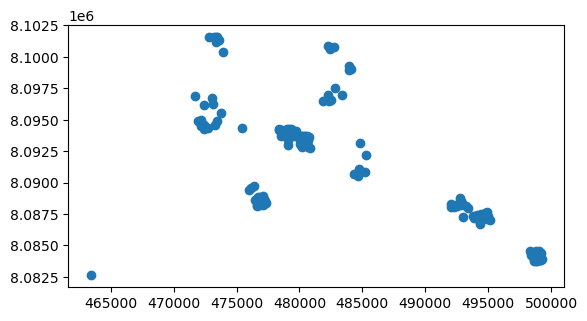

In [80]:
puntos_indi.plot()

In [81]:
# Asegurarse de que ambos GeoDataFrames tienen el mismo sistema de coordenadas (CRS)
if puntos_indi.crs != gdf_siembras.crs:
    print('Los CRS no son iguales')
    #gdf_siembras = gdf_siembras.to_crs(puntos_indi.crs)
else:
    print('Los CRS si son iguales')

Los CRS si son iguales


In [82]:
# Crear un GeoDataFrame vacío para almacenar los puntos que no intersectan con ningún polígono de siembras
puntos_indi_solicitado = puntos_indi[~puntos_indi.geometry.apply(lambda point: any(gdf_siembras.contains(point)))]

In [83]:
puntos_indi_solicitado

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
72,446,AGUILERA ANEZ JHONNY,59,0,None,None,POINT (498567.117 8084099.325)
72,446,AGUILERA ANEZ JHONNY,59,0,None,None,POINT (498908.528 8083784.868)
72,446,AGUILERA ANEZ JHONNY,59,0,None,None,POINT (499103.312 8083838.326)
72,446,AGUILERA ANEZ JHONNY,59,0,None,None,POINT (499185.250 8083880.014)
72,446,AGUILERA ANEZ JHONNY,59,0,None,None,POINT (499155.062 8084174.705)
...,...,...,...,...,...,...,...
79,388,AGROPECUARIA MARIANA S.R.L.,59,0,None,None,POINT (485293.805 8092184.139)
79,388,AGROPECUARIA MARIANA S.R.L.,59,0,None,None,POINT (484718.202 8091115.424)
79,388,AGROPECUARIA MARIANA S.R.L.,59,0,None,None,POINT (485206.883 8090835.102)
79,388,AGROPECUARIA MARIANA S.R.L.,59,0,None,None,POINT (484327.745 8090712.135)


In [84]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi_solicitado, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [85]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [86]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
649,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,B6.2,7.590585,3,50,"POLYGON ((473166.109 8096445.273, 473204.552 8..."
650,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C5,10.997715,3,50,"POLYGON ((472152.922 8094712.295, 472192.512 8..."
1252,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L11,12.633153,1,69,"POLYGON ((485421.387 8091965.097, 485041.720 8..."
1253,17,LA ESTACADA--OLGUITA,1215,AGUILERA RIVERO OLGA KARINA,C1,16.911624,2,50,"POLYGON ((473060.606 8094963.111, 473157.597 8..."
1255,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO VDA DE,C9,9.629609,1,50,"POLYGON ((471983.822 8095194.205, 472056.437 8..."
...,...,...,...,...,...,...,...,...,...
13151,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C17.2,2.691717,123,124,"POLYGON ((480393.823 8093681.801, 480425.900 8..."
13361,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C8.5,0.503588,123,124,"POLYGON ((479102.847 8093816.988, 479104.933 8..."
13362,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C17.1,1.584073,1,124,"POLYGON ((480329.713 8093433.469, 480330.422 8..."
13363,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C18.2,0.773617,123,124,"POLYGON ((480359.700 8093427.877, 480359.700 8..."


In [87]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi_solicitado.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [88]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
649,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,B6.2,7.590585,3,50,"POLYGON ((473166.109 8096445.273, 473204.552 8..."
650,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C5,10.997715,3,50,"POLYGON ((472152.922 8094712.295, 472192.512 8..."
1252,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L11,12.633153,1,69,"POLYGON ((485421.387 8091965.097, 485041.720 8..."
1253,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C1,16.911624,2,50,"POLYGON ((473060.606 8094963.111, 473157.597 8..."
1255,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C9,9.629609,1,50,"POLYGON ((471983.822 8095194.205, 472056.437 8..."
...,...,...,...,...,...,...,...,...,...
13151,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C17.2,2.691717,123,124,"POLYGON ((480393.823 8093681.801, 480425.900 8..."
13361,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C8.5,0.503588,123,124,"POLYGON ((479102.847 8093816.988, 479104.933 8..."
13362,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C17.1,1.584073,1,124,"POLYGON ((480329.713 8093433.469, 480330.422 8..."
13363,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C18.2,0.773617,123,124,"POLYGON ((480359.700 8093427.877, 480359.700 8..."


In [89]:
# agrega los campos faltantes
poligonos_intersect_cat['fecha_ini'] = ''
poligonos_intersect_cat['origen'] = 'SOLICITUD'
poligonos_intersect_cat['dias'] = 0
poligonos_intersect_cat['fecha'] = ''
poligonos_intersect_cat['os'] = ors

In [90]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os
649,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,B6.2,7.590585,3,50,"POLYGON ((473166.109 8096445.273, 473204.552 8...",,SOLICITUD,0,,59
650,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C5,10.997715,3,50,"POLYGON ((472152.922 8094712.295, 472192.512 8...",,SOLICITUD,0,,59
1252,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L11,12.633153,1,69,"POLYGON ((485421.387 8091965.097, 485041.720 8...",,SOLICITUD,0,,59
1253,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C1,16.911624,2,50,"POLYGON ((473060.606 8094963.111, 473157.597 8...",,SOLICITUD,0,,59
1255,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C9,9.629609,1,50,"POLYGON ((471983.822 8095194.205, 472056.437 8...",,SOLICITUD,0,,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13151,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C17.2,2.691717,123,124,"POLYGON ((480393.823 8093681.801, 480425.900 8...",,SOLICITUD,0,,59
13361,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C8.5,0.503588,123,124,"POLYGON ((479102.847 8093816.988, 479104.933 8...",,SOLICITUD,0,,59
13362,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C17.1,1.584073,1,124,"POLYGON ((480329.713 8093433.469, 480330.422 8...",,SOLICITUD,0,,59
13363,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,C18.2,0.773617,123,124,"POLYGON ((480359.700 8093427.877, 480359.700 8...",,SOLICITUD,0,,59


In [91]:
# SELECCIONAR LOS LOTES DE SIEMBRAS
# identifoca los lotes que se intersectan
gdf_lotes_siem = gpd.sjoin(gdf_siembras, multipoint_gdf, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_siem = gdf_siembras.loc[gdf_siembras.index.isin(gdf_lotes_siem.index)]
# copy
poligonos_intersect_siem = poligonos_intersect_siem.copy()
# agregar campo de semana_planificacion
poligonos_intersect_siem['os'] = ors

In [92]:
# crea el campo soca, y coloca 0 o 1 dependiendo del origen
poligonos_intersect_siem['soca'] = poligonos_intersect_siem['origen'].apply(lambda x: 1 if 'SIEMBRA 2023' in x else 0)

In [93]:
poligonos_intersect_siem = poligonos_intersect_siem[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area',
       'fecha_ini', 'origen', 'dias', 'fecha', 'prioridad', 'inst', 'geometry', 'os', 'soca']]

In [94]:
poligonos_intersect_siem

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,inst,geometry,os,soca
27,98,TERRANOVA--ESPINOZA,2662,DON SERAFIN SRL.,L8,3.041487,31/5/2024,SIEMBRA 2023,64.0,2024-05-31,3,3.0,"POLYGON ((481950.097 8096353.770, 481791.250 8...",59,1
46,400,TOTAISAL--AGUILERA AÃ‘EZ,446,AGUILERA ANEZ JHONNY,L13,2.498861,20/6/2024,SIEMBRA 2023,44.0,2024-06-20,4,66.0,"POLYGON ((498592.377 8084146.610, 498678.283 8...",59,1
114,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L11,0.880789,15/5/2024,SIEMBRA 2023,80.0,2024-05-15,1,62.0,"POLYGON ((473618.582 8101376.052, 473620.175 8...",59,1
167,400,TOTAISAL--AGUILERA AÃ‘EZ,446,AGUILERA ANEZ JHONNY,L7.1,1.809389,20/6/2024,SIEMBRA 2023,44.0,2024-06-20,4,66.0,"POLYGON ((498934.998 8083940.478, 498983.939 8...",59,1
173,1395,LA CANDELARIA--DAVID SUAREZ DEMIQUEL,13171,SUAREZ JUSTINIANO DAVID,L1,24.914442,17/7/2024,SIEMBRA 2023,0.0,2024-07-17,1,62.0,"POLYGON ((475417.487 8094924.975, 475426.615 8...",59,1
191,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L3,2.773897,5/6/2024,SIEMBRA 2023,89.0,2024-06-05,1,62.0,"POLYGON ((472912.371 8101639.290, 472912.784 8...",59,1
231,13,GUAYABOCHI--AGUILERA,86,AGUILERA TARADELLES JOSE LUIS,L5.4,14.524238,21/5/2024,SIEMBRA 2023,74.0,2024-05-21,4,50.0,"POLYGON ((494258.262 8086459.532, 494234.413 8...",59,1
237,400,TOTAISAL--AGUILERA AÃ‘EZ,446,AGUILERA ANEZ JHONNY,L3,4.356825,20/6/2024,SIEMBRA 2023,44.0,2024-06-20,4,66.0,"POLYGON ((499241.574 8083788.512, 499160.682 8...",59,1
256,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.3,1.091832,21/5/2024,SIEMBRA 2023,74.0,2024-05-21,1,62.0,"POLYGON ((473507.177 8101637.367, 473502.340 8...",59,1
257,458,RINCON DE GUENDA--CALLE,41819,AGROPECUARIA GUSTAVITO SRL,L7.1,3.330107,5/6/2024,SIEMBRA 2023,89.0,2024-06-05,7,304.0,"POLYGON ((463457.391 8082738.455, 463494.937 8...",59,1


In [95]:
# Concatenar los DataFrames a lo largo de las filas (axis=0)
plan = pd.concat([poligonos_intersect_cat, poligonos_intersect_siem], axis=0)
# Si deseas restablecer el índice después de concatenar
plan.reset_index(drop=True, inplace=True)

<Axes: >

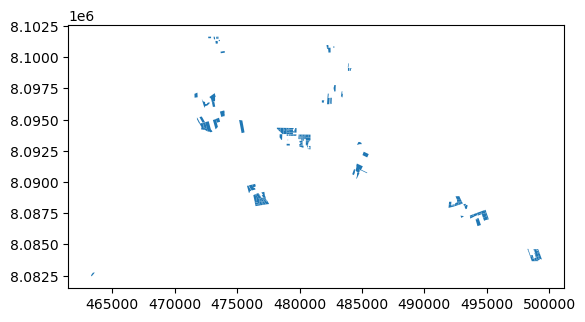

In [96]:
plan.plot()

In [97]:
plan['area'].sum()

724.049984378957

In [98]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [99]:
plan['area'].sum()

724.0499843790832

In [100]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [101]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [102]:
last_id

700

In [103]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [104]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,B6.2,7.590585,3,50,"POLYGON ((473166.109 8096445.273, 473204.552 8...",,SOLICITUD,0.0,,59,NaN,701
1,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C5,10.997715,3,50,"POLYGON ((472152.922 8094712.295, 472192.512 8...",,SOLICITUD,0.0,,59,NaN,702
2,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L11,12.633153,1,69,"POLYGON ((485421.387 8091965.097, 485041.720 8...",,SOLICITUD,0.0,,59,NaN,703
3,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C1,16.911624,2,50,"POLYGON ((473060.606 8094963.111, 473157.597 8...",,SOLICITUD,0.0,,59,NaN,704
4,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C9,9.629609,1,50,"POLYGON ((471983.822 8095194.205, 472056.437 8...",,SOLICITUD,0.0,,59,NaN,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,483,DON SERAFIN S.R.L--BOLIVAR,2662,DON SERAFIN SRL.,L11,3.049049,0,0.0,"POLYGON ((482330.845 8100756.122, 482195.476 8...",2024-04-26,SIEMBRA 2024,99.0,2024-04-26,59,1.0,862
162,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L14.1,7.148919,0,0.0,"POLYGON ((498839.020 8083651.273, 498608.983 8...",2024-05-09,SIEMBRA 2024,86.0,2024-05-09,59,4.0,863
163,483,DON SERAFIN S.R.L--BOLIVAR,2662,DON SERAFIN SRL.,L14,7.636036,0,0.0,"POLYGON ((482481.877 8100753.194, 482491.489 8...",2024-04-26,SIEMBRA 2024,99.0,2024-04-26,59,1.0,864
164,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L8,11.214586,0,0.0,"POLYGON ((499155.935 8084036.495, 499057.708 8...",2024-05-06,SIEMBRA 2024,89.0,2024-05-06,59,4.0,865


In [105]:
len(plan)

166

In [106]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

In [107]:
gdf_pla_gral['area'].sum()

6111.378930737159

In [108]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [109]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

In [110]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,...,os,soca,id,inst,telefono_1,telefono_2,telefono_3,idd,asignado,geometry
0,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,37,2024-05-21,...,26,1,1,69,0.0,0.0,0.0,35,None,"POLYGON ((488616.298 8103763.516, 488519.488 8..."
1,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.2,1.835936,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,2,62,0.0,0.0,NaN,54,None,"POLYGON ((473330.370 8101634.734, 473440.011 8..."
2,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L6,1.960231,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,3,62,0.0,0.0,NaN,54,None,"POLYGON ((473242.172 8101427.289, 473148.580 8..."
3,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L9.1,3.607907,2024-04-16,SIEMBRA 2024,72,2024-04-16,...,26,0,4,62,0.0,0.0,NaN,54,None,"POLYGON ((473286.579 8101086.503, 473265.875 8..."
4,2123,LAS CHACRAS PORTACHUELO,13132,ZUMARAN MENACHO JORGE,L1.6,0.386826,2024-04-22,SIEMBRA 2024,66,2024-04-22,...,26,0,5,50,0.0,0.0,NaN,63,None,"POLYGON ((455236.898 8084312.120, 455248.807 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,483,DON SERAFIN S.R.L--BOLIVAR,2662,DON SERAFIN SRL.,L11,3.049049,2024-04-26,SIEMBRA 2024,99,2024-04-26,...,59,0,862,0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((482330.845 8100756.122, 482195.476 8..."
814,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L14.1,7.148919,2024-05-09,SIEMBRA 2024,86,2024-05-09,...,59,0,863,0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((498839.020 8083651.273, 498608.983 8..."
815,483,DON SERAFIN S.R.L--BOLIVAR,2662,DON SERAFIN SRL.,L14,7.636036,2024-04-26,SIEMBRA 2024,99,2024-04-26,...,59,0,864,0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((482481.877 8100753.194, 482491.489 8..."
816,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L8,11.214586,2024-05-06,SIEMBRA 2024,89,2024-05-06,...,59,0,865,0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((499155.935 8084036.495, 499057.708 8..."


# CARGAR PLANIFICACION A AMIGOCLOUD

In [111]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [112]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [113]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [114]:
len(gdf_pla_gral)

166

In [115]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/33457/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_345601 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, origen, dias, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['origen']}', '{row['dias']}', '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CREAR KMLS DE PLANIFICACION

In [116]:
gdf_plan = gpd.read_file(path_plan)

In [117]:
gdf_plan_sem = gdf_plan[gdf_plan['os'] == ors]
gdf_plan_sem['area'].sum()

724.0499843790832

In [118]:
lista_cods = list(set(gdf_plan_sem['unidad_01']))

In [119]:
lista_cods

[98, 483, 1958, 458, 299, 13, 400, 17, 19, 1395, 628, 54, 55, 1587, 218, 187]

In [120]:
for i in lista_cods:
    prop = gdf_plan_sem[gdf_plan_sem['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\98
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\483
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\1958
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\458
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\299
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\13
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\400
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\17
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\19
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2

# CARGAR XLSX

In [121]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [122]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [123]:
excel_data = pd.read_excel(path_xlsx_parte)

In [124]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,B6.2,7.590585,3,50,"MULTIPOLYGON (((-63.25239 -17.21679, -63.25203...",,SOLICITUD,0,,59,NaN,701
1,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C5,10.997715,3,50,"MULTIPOLYGON (((-63.26194 -17.23244, -63.26157...",,SOLICITUD,0,,59,NaN,702
2,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L11,12.633153,1,69,"MULTIPOLYGON (((-63.13715 -17.25740, -63.14072...",,SOLICITUD,0,,59,NaN,703
3,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C1,16.911624,2,50,"MULTIPOLYGON (((-63.25340 -17.23018, -63.25249...",,SOLICITUD,0,,59,NaN,704
4,17,LA ESTACADA--OLGUITA,515,AGUILERA OLGA RIVERO DE,C9,9.629609,1,50,"MULTIPOLYGON (((-63.26352 -17.22808, -63.26284...",,SOLICITUD,0,,59,NaN,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,483,DON SERAFIN S.R.L--BOLIVAR,2662,DON SERAFIN SRL.,L11,3.049049,0,0,"MULTIPOLYGON (((-63.16615 -17.17791, -63.16743...",2024-04-26,SIEMBRA 2024,99,2024-04-26,59,1.0,862
162,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L14.1,7.148919,0,0,"MULTIPOLYGON (((-63.01093 -17.33259, -63.01309...",2024-05-09,SIEMBRA 2024,86,2024-05-09,59,4.0,863
163,483,DON SERAFIN S.R.L--BOLIVAR,2662,DON SERAFIN SRL.,L14,7.636036,0,0,"MULTIPOLYGON (((-63.16473 -17.17794, -63.16465...",2024-04-26,SIEMBRA 2024,99,2024-04-26,59,1.0,864
164,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L8,11.214586,0,0,"MULTIPOLYGON (((-63.00794 -17.32911, -63.00887...",2024-05-06,SIEMBRA 2024,89,2024-05-06,59,4.0,865


In [125]:
list(gdf_pla_gral['unidad_01'])

[17,
 17,
 218,
 17,
 17,
 17,
 17,
 400,
 400,
 400,
 400,
 400,
 54,
 19,
 13,
 55,
 54,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 400,
 55,
 299,
 299,
 17,
 299,
 299,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 400,
 54,
 54,
 13,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 299,
 13,
 13,
 13,
 299,
 299,
 299,
 299,
 299,
 299,
 400,
 17,
 54,
 54,
 299,
 299,
 299,
 13,
 17,
 17,
 54,
 17,
 218,
 13,
 299,
 299,
 299,
 299,
 13,
 299,
 299,
 299,
 55,
 299,
 17,
 54,
 54,
 299,
 218,
 55,
 55,
 55,
 13,
 55,
 55,
 55,
 55,
 55,
 299,
 299,
 299,
 299,
 299,
 299,
 218,
 54,
 13,
 13,
 400,
 54,
 299,
 55,
 299,
 299,
 299,
 299,
 1958,
 98,
 400,
 187,
 400,
 1395,
 187,
 13,
 400,
 187,
 458,
 98,
 98,
 400,
 13,
 98,
 400,
 55,
 187,
 187,
 187,
 628,
 218,
 628,
 628,
 1587,
 400,
 98,
 483,
 483,
 400,
 483,
 400,
 98]

In [126]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'FINANCIADO': list(gdf_pla_gral['origen']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [127]:
new_df['PRODUCTO'] = 'TRICHOGRAMMA'
new_df['DOSIS'] = '6ml'

In [128]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,FINANCIADO,ID,OS,PRODUCTO,DOSIS
0,50,515,AGUILERA OLGA RIVERO DE,17,LA ESTACADA--OLGUITA,B6.2,7.590585,3,SOLICITUD,701,59,TRICHOGRAMMA,6ml
1,50,515,AGUILERA OLGA RIVERO DE,17,LA ESTACADA--OLGUITA,C5,10.997715,3,SOLICITUD,702,59,TRICHOGRAMMA,6ml
2,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L11,12.633153,1,SOLICITUD,703,59,TRICHOGRAMMA,6ml
3,50,515,AGUILERA OLGA RIVERO DE,17,LA ESTACADA--OLGUITA,C1,16.911624,2,SOLICITUD,704,59,TRICHOGRAMMA,6ml
4,50,515,AGUILERA OLGA RIVERO DE,17,LA ESTACADA--OLGUITA,C9,9.629609,1,SOLICITUD,705,59,TRICHOGRAMMA,6ml
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,2662,DON SERAFIN SRL.,483,DON SERAFIN S.R.L--BOLIVAR,L11,3.049049,0,SIEMBRA 2024,862,59,TRICHOGRAMMA,6ml
162,0,446,AGUILERA ANEZ JHONNY,400,TOTAISAL--AGUILERA AÑEZ,L14.1,7.148919,0,SIEMBRA 2024,863,59,TRICHOGRAMMA,6ml
163,0,2662,DON SERAFIN SRL.,483,DON SERAFIN S.R.L--BOLIVAR,L14,7.636036,0,SIEMBRA 2024,864,59,TRICHOGRAMMA,6ml
164,0,446,AGUILERA ANEZ JHONNY,400,TOTAISAL--AGUILERA AÑEZ,L8,11.214586,0,SIEMBRA 2024,865,59,TRICHOGRAMMA,6ml


In [129]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [130]:
final_data.to_excel(path_xlsx_parte, index=False)